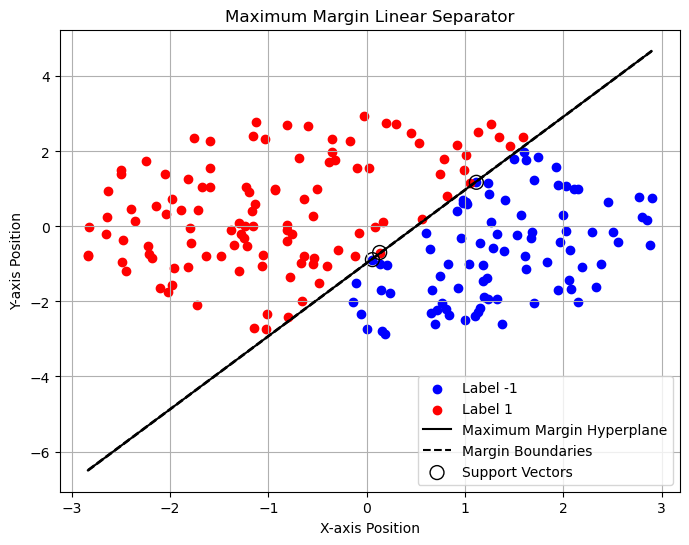

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC  # Support Vector Classifier for maximum margin hyperplane

# Load the CSV file
file_path = 'input.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Extract features and labels
X = data.iloc[:, [0, 1]].values  # X-axis and Y-axis positions
y = data.iloc[:, 2].values       # Labels (-1 or 1)

# Train a Support Vector Machine (SVM) with a linear kernel
svm = SVC(kernel='linear', C=1e5)  # Use a large C for hard margin
svm.fit(X, y)

# Extract the hyperplane parameters
w = svm.coef_[0]  # Normal vector to the hyperplane
b = svm.intercept_[0]

# SVM decision boundary (maximum margin hyperplane)
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(w[0] / w[1]) * x_vals - b / w[1]  # Solve for y from wx + by + c = 0

# Margin boundaries
margin = 1 / np.sqrt(np.sum(w**2))  # Margin distance
y_vals_upper = y_vals + margin
y_vals_lower = y_vals - margin

# Plot points and hyperplanes
plt.figure(figsize=(8, 6))
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='blue', label='Label -1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Label 1')
plt.plot(x_vals, y_vals, 'k-', label='Maximum Margin Hyperplane')
plt.plot(x_vals, y_vals_upper, 'k--', label='Margin Boundaries')
plt.plot(x_vals, y_vals_lower, 'k--')

# Highlight support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Add labels, title, and legend
plt.xlabel('X-axis Position')
plt.ylabel('Y-axis Position')
plt.title('Maximum Margin Linear Separator')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
